# Titanic_Project

In [1554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1 Exploratory Data Analysis

### 1.1 Data Overview

In [1555]:
# identify the number of survivors
df = pd.read_csv('titanic data\\train.csv')
df['Survived'].sum()

342

In [1556]:
# identify the numbe of passengers survived under 18
df = pd.read_csv('titanic data\\train.csv')
df[df['Age'] < 18]['Survived'].sum()

61

In [1557]:
# identify the number of male and female passengers
df = pd.read_csv('titanic data\\train.csv')
df.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [1558]:
# import file from excel named train
df = pd.read_csv('titanic data\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1559]:
# display the number of rows and columns
df.shape

(891, 12)

## 2 Preprocessing

### 2.1 Missing values

In [1560]:
# remove the passengerId column
df = df.drop(['PassengerId'], axis=1) # we don't want to use PassengerId as a feature

In [1561]:
# remove the ticket column
df = df.drop(['Ticket', 'Name', 'Cabin'], axis=1)

In [1562]:
# display all the columns with mising values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [1563]:
# impute the missing values with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [1564]:
# display all the missing values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

### 2.2 Encoding

In [1565]:
# identify data types
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [1566]:
# unique values for the "Sex" column
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [1567]:
# encode the "Sex" column with 0 and 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [1568]:
# unique values for the "Embarked" column
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1569]:
# encode the "Embarked" column with 0, 1, 2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [1570]:
# impute the missing values in embarked with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [1571]:
# display all the missing values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1572]:
# identify data types
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

### 2.3 Graphs

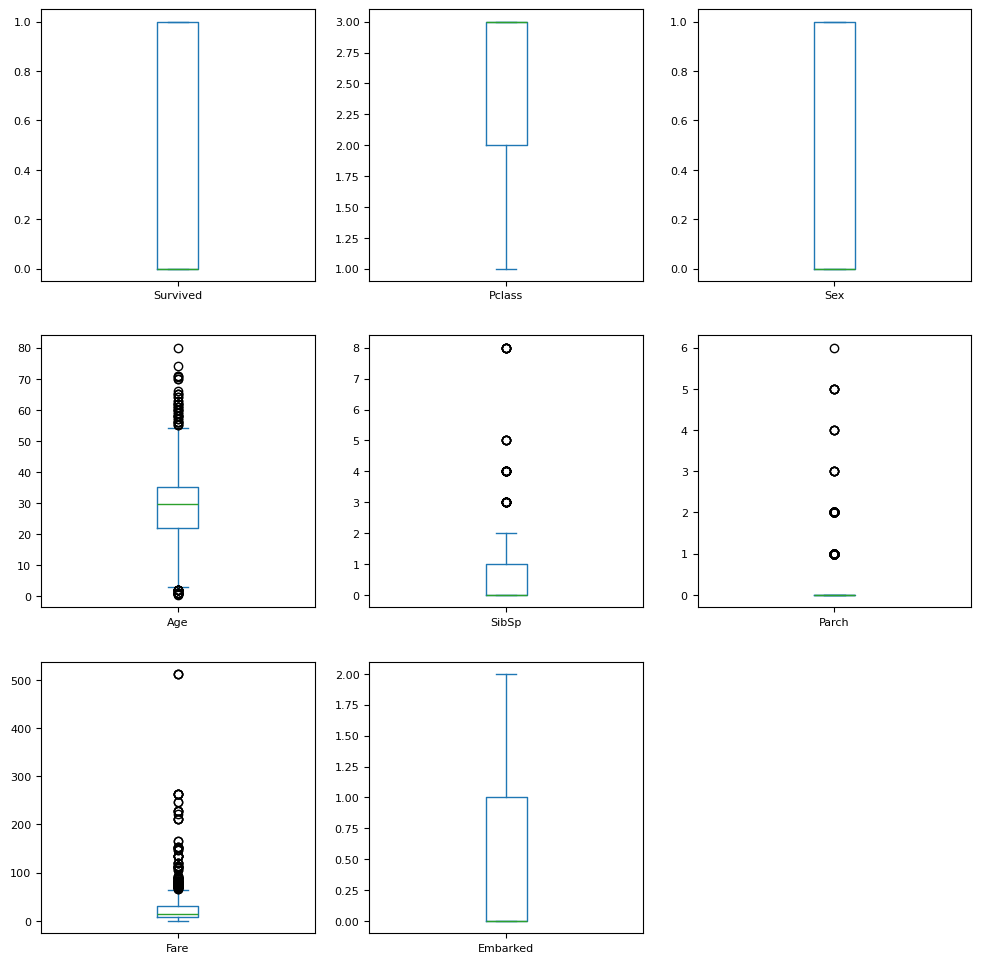

In [1573]:
# draw a box plot of all numerical variables with outliers with labels
figsize = (12,12)
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8, figsize=(12,12))
plt.show()

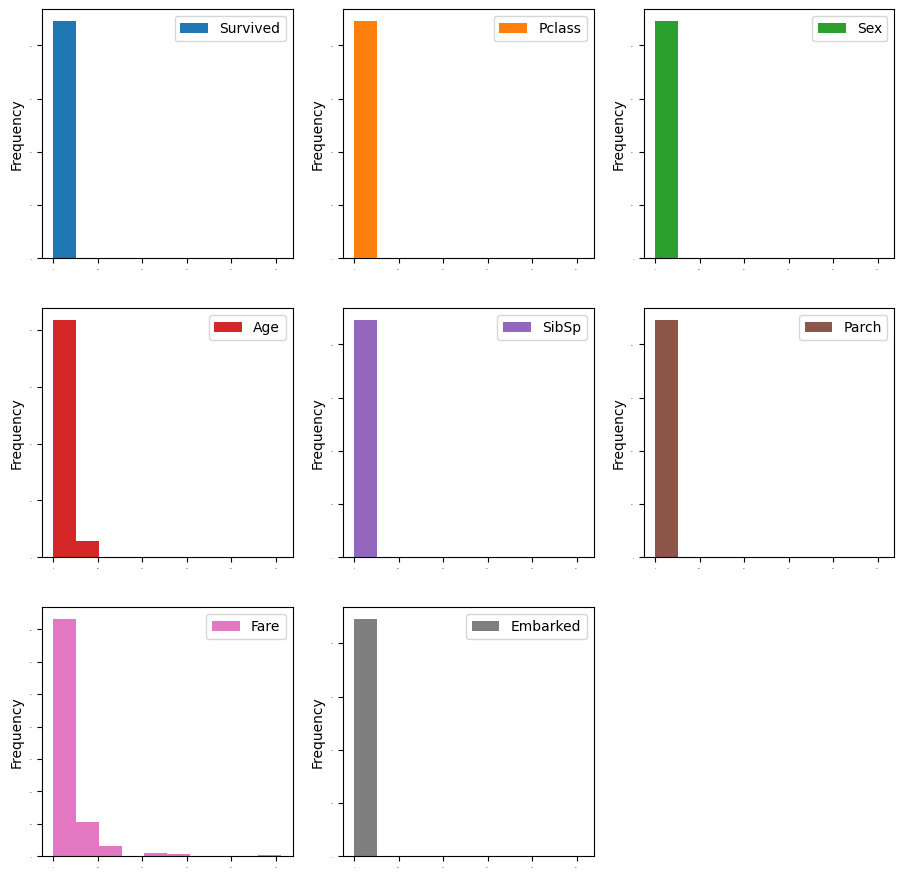

In [1574]:
# draw a histogram of all numerical variables with labels
figsize = (11,11)
df.plot(kind='hist', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=1, figsize=figsize)
plt.show()

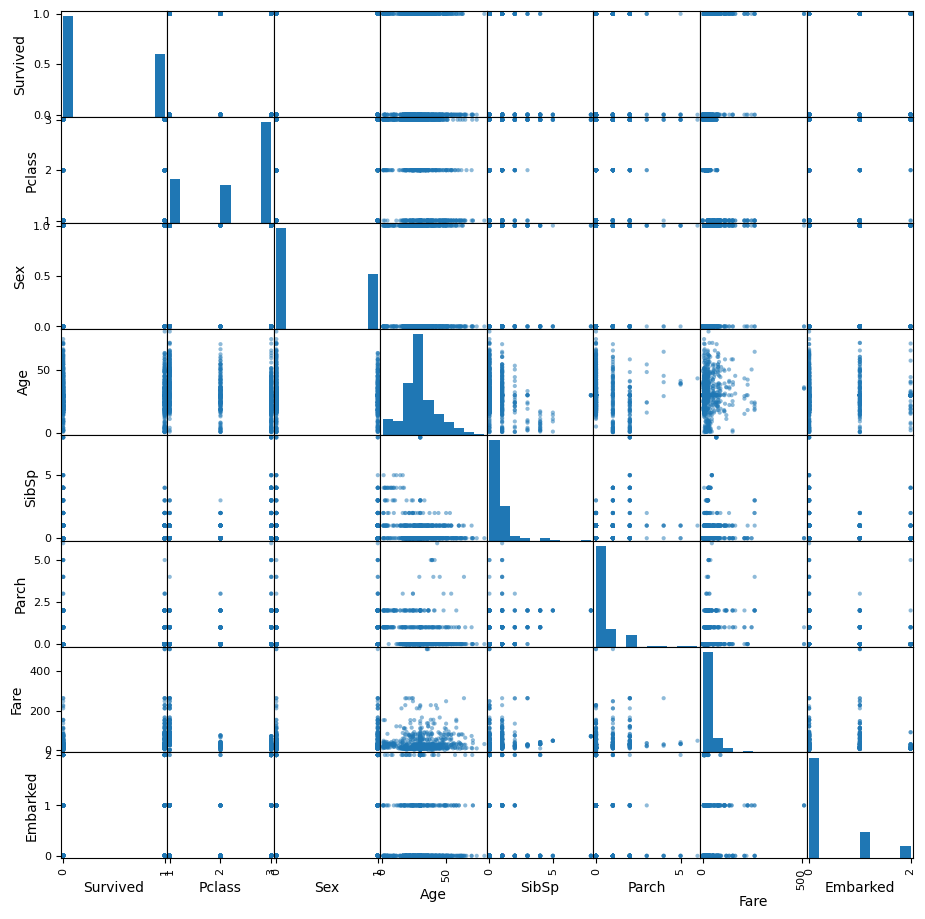

In [1575]:
# draw a scatter matrix of all numerical variables
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(11,11))
plt.show()

#### 2.4 Data Scaling

In [1576]:
# identify the max age 
df['Age'].max()

80.0

In [1577]:
# indentify the max fare
df['Fare'].max()

512.3292

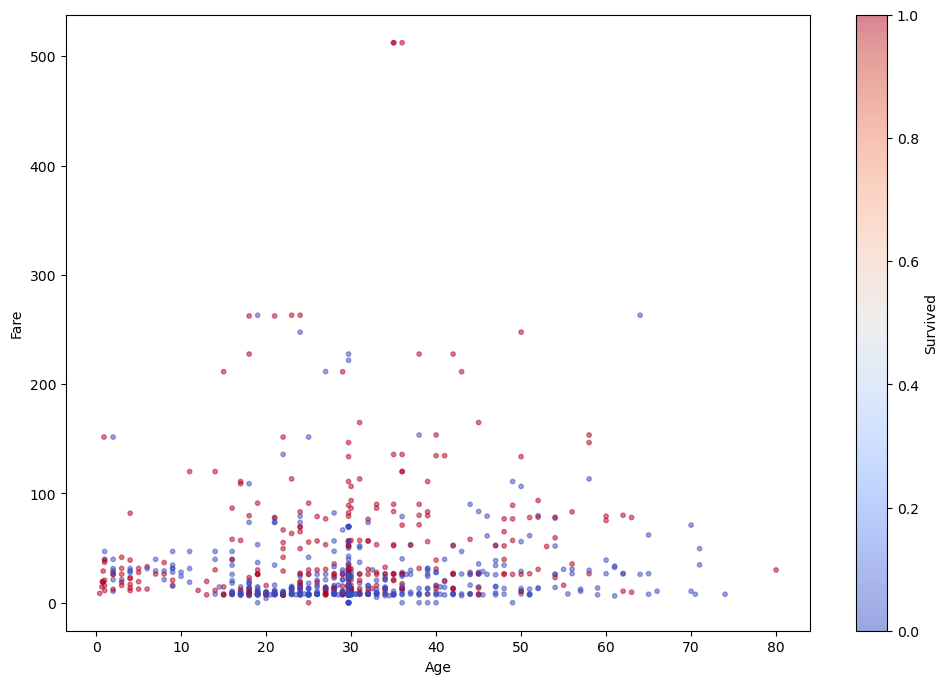

In [1578]:
# draw a scatter plot for all values in fare with age 80 and below
df.plot(kind='scatter', x='Age', y='Fare', alpha=0.5, s=10, figsize=(12, 8), c='Survived', cmap=plt.get_cmap('coolwarm'))
plt.show()

In [1579]:
# remove the rows in fare above 200
df = df[df['Fare'] < 200]

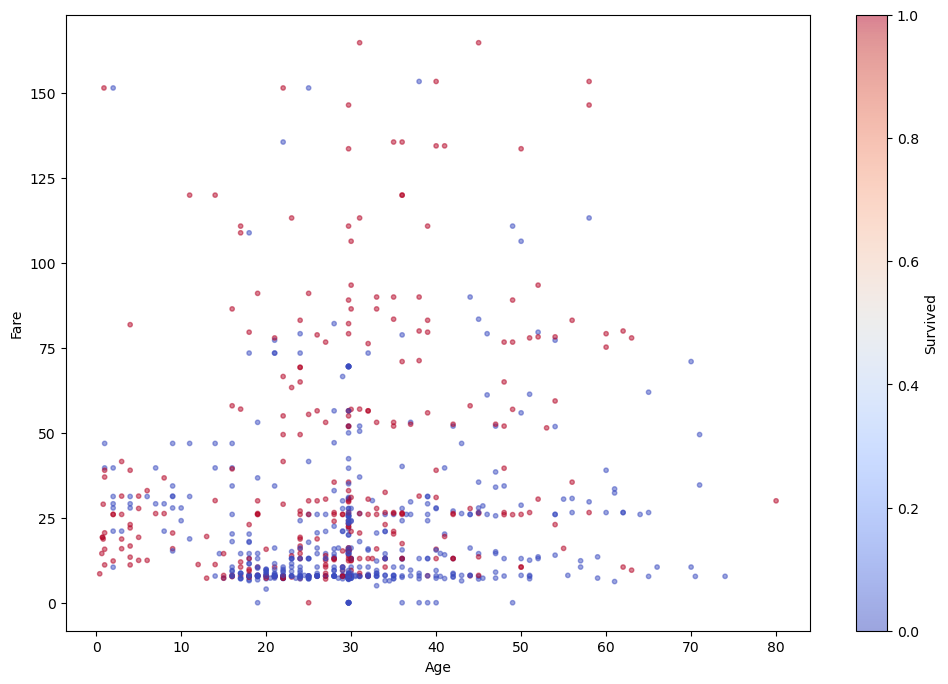

In [1580]:
# draw a scatter plot for all values in fare with age 80 and below
df.plot(kind='scatter', x='Age', y='Fare', alpha=0.5, s=10, figsize=(12, 8), c='Survived', cmap=plt.get_cmap('coolwarm'))

plt.show()

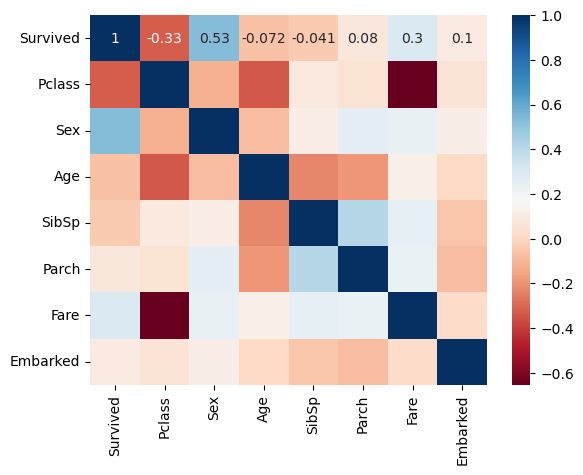

In [1581]:
# show correlation
df.corr()
# show heatmap
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [1582]:
# display all the columns
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

## 3 Logistic Regression

### 3.1 Training

In [1583]:
# use hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# use cross validation
from sklearn.model_selection import cross_val_score

In [1584]:
# use logistic regression
from sklearn.linear_model import LogisticRegression
# use other models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# import gradientboostingtreemodel
from sklearn.ensemble import GradientBoostingClassifier

# use train test split
from sklearn.model_selection import train_test_split
# use confusion matrix
from sklearn.metrics import confusion_matrix
# use classification report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [1585]:
# let x= all the numerical columns except survived
x = df.drop(['Survived'], axis=1)
# y=Survived
y = df['Survived']

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1586]:
# Initialize and train each model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

In [1587]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.7657142857142857
Decision Tree Accuracy: 0.7714285714285715
Random Forest Accuracy: 0.8171428571428572
XGBoost Accuracy: 0.8
Gradient Boosting Accuracy: 0.7714285714285715


In [1588]:
# use random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.8171428571428572


### 3.2 Testing

In [1589]:
predictions = rf.predict(x_test) 

cm = confusion_matrix(y_test, predictions) 
print("Confusion Matrix:\n", cm)

cr = classification_report(y_test, predictions)
print("Classification Report:\n", cr)

Confusion Matrix:
 [[86 16]
 [16 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       102
           1       0.78      0.78      0.78        73

    accuracy                           0.82       175
   macro avg       0.81      0.81      0.81       175
weighted avg       0.82      0.82      0.82       175



## 4 Tesing Data

In [1590]:
# import test.csv file 
test = pd.read_csv('titanic data\\test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 5 Preprocessing (test)

### 5.1 Dropping

In [1591]:
# remove non numeric columns
test.drop(['Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

In [1592]:
# drop the PassengerId column
test.drop(['PassengerId'], axis=1, inplace=True)

### 5.2 Missing values

In [1593]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [1594]:
test['Age'] = test['Age'].fillna(test['Age'].mean()) # fill with the mean
test['Fare'] = test['Fare'].fillna(test['Fare'].mean()) # fill with the mean

In [1595]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 5.3 Encoding testing data

In [1596]:
# encode the sex column
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [1597]:
# encode the embarked column with 0,1,2
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [1598]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [1599]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 6 Loading the model

In [1600]:
# load the trained model
import pickle
with open('titanic_model.pkl', 'rb') as f:
    lr = pickle.load(f)

# predict the test data
y_pred = lr.predict(test)

In [1601]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

## 7 Submission

In [1602]:
# show the rows and columns
y_pred.shape

(418,)

In [1603]:
# create a csv file with exactly 418 entries plus a hearder row (PassenerId, Survived)
# use y_pred to fill in the Survived column

submission = pd.DataFrame({'PassengerId': range(892, 1310), 'Survived': y_pred}) # create the dataframe

submission.to_csv('submission.csv', index=False, header=True) # save the csv file

In [1604]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
